In [1]:
## Columns description:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, mean_squared_error, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  

In [3]:
# Reading Dataset
df_train = pd.read_csv(r'..\Datasets\heart.csv')

In [4]:
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
for i in df_train.columns:
    print(i, df_train[i].nunique())
    if(df_train[i].nunique() < 10):
        print(list(df_train[i].unique()))
    print('*************************')

age 41
*************************
sex 2
[1, 0]
*************************
cp 4
[3, 2, 1, 0]
*************************
trestbps 49
*************************
chol 152
*************************
fbs 2
[1, 0]
*************************
restecg 3
[0, 1, 2]
*************************
thalach 91
*************************
exang 2
[0, 1]
*************************
oldpeak 40
*************************
slope 3
[0, 2, 1]
*************************
ca 5
[0, 2, 1, 3, 4]
*************************
thal 4
[1, 2, 3, 0]
*************************
target 2
[1, 0]
*************************


In [7]:
# Rename columns for better readability
df_train.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_pressure',
                    'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'slope',
                    'num_major_vessels', 'thal', 'target']

# Check if there are any null values or not

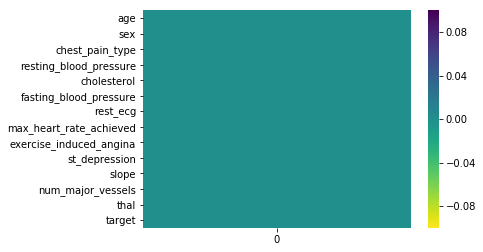

In [8]:
sns.heatmap(df_train.isnull().sum().to_frame(), cmap = 'viridis_r',)

<b>There are no null values</b>

# EDA

In [9]:
# gender_having_Disease = df_train[df_train['target'] == 1].groupby('sex').count()['target']
# gender_having_Disease = pd.DataFrame({'Sex': gender_having_Disease.index, 'Values': gender_having_Disease.values})
# gender_having_Disease['Sex'].loc[0] = 'Female'
# gender_having_Disease['Sex'].loc[1] = 'Male'
# gender_list = gender_having_Disease['Sex'].values.tolist()
# gender_list_count = gender_having_Disease['Values'].values.tolist()

In [10]:
# cp_type_with_disease = df_train[df_train['target'] == 1].groupby('chest_pain_type').count()['target']

In [11]:
# #thalach
# max_rate_with_disease = df_train[df_train['target'] == 1]['max_heart_rate_achieved'].tolist()
# max_rate_without_disease = df_train[df_train['target'] == 0]['max_heart_rate_achieved'].tolist()
# len(max_rate_without_disease)

In [12]:

# cp_type_with_disease = df_train[df_train['target'] == 1].groupby('chest_pain_type').count()['target']
# cp_type_with_disease = pd.DataFrame({'Type': cp_type_with_disease.index, 'Values': cp_type_with_disease.values})
# cp_type_with_disease['Type'].loc[0] = 'typical angina'
# cp_type_with_disease['Type'].loc[1] = 'atypical angina'
# cp_type_with_disease['Type'].loc[2] = 'non- anginal pain'
# cp_type_with_disease['Type'].loc[3] = 'asymptomatic'
# total = cp_type_with_disease['Values'].sum()
# cp_with_disease_list = cp_type_with_disease['Type'].values.tolist()
# cp_type_with_disease['Values'] = cp_type_with_disease['Values'].div(total).mul(100)
# cp_type_with_disease['Values'] = round(cp_type_with_disease['Values'], 2).astype(str) +' %'
# cp_with_disease_count = cp_type_with_disease['Values'].values.tolist()

<h3>Chest pain type having heart disease.</h3>

([<matplotlib.axis.XTick at 0x126564f0b38>,
 <a list of 4 Text xticklabel objects>)

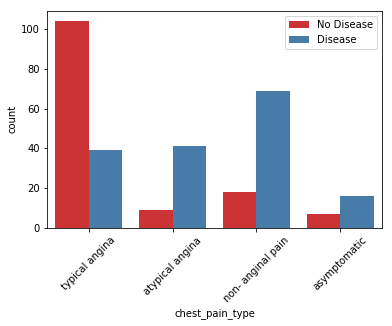

In [13]:
sns.countplot(x = 'chest_pain_type', data = df_train, hue = 'target', palette = sns.color_palette('Set1'))
plt.legend(['No Disease', 'Disease'])
plt.xticks([0,1,2,3], ['typical angina', 'atypical angina', 'non- anginal pain', 'asymptomatic'], rotation = 45)

<b>Patients with non-anginal type of chest pain are more likely to have heart disease</b>

<h3>Different graph for continuous values like age, resting blood pressure, cholesterol, etc.</h3>

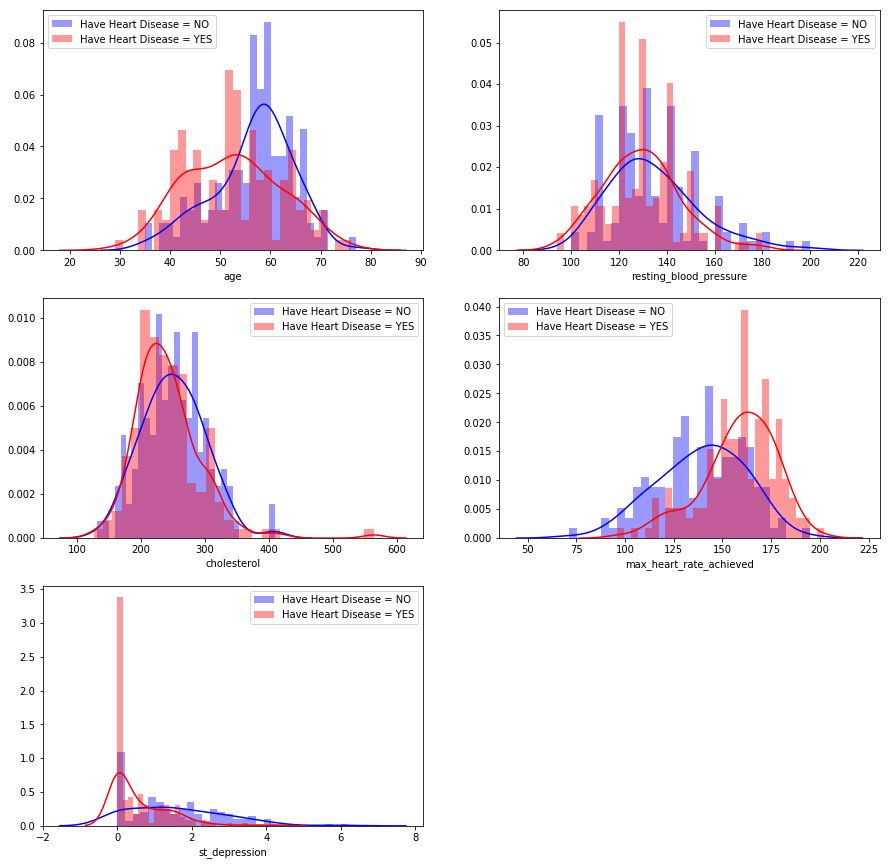

In [14]:
plt.figure(figsize=(15, 15))
continous_val = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression']
for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    sns.distplot(df_train[df_train["target"] == 0][column], bins=30, color='blue', label='Have Heart Disease = NO')
    sns.distplot(df_train[df_train["target"] == 1][column], bins=30, color='red', label='Have Heart Disease = YES')
    plt.legend()
    plt.xlabel(column)

<b>Resting blood pressure falls under same range for patients who have and don't have the disease. <br />
    Max heart rate: <br /> </b>
    Around 150 (No heart Disease) <br/>
    Around 170 -175 (Heart Disease)


<h3>Cholesterol level for different age groups.</h3>

In [15]:
df_train["agegrp"]=pd.cut(df_train.age, [29,40,50,60,70,80])

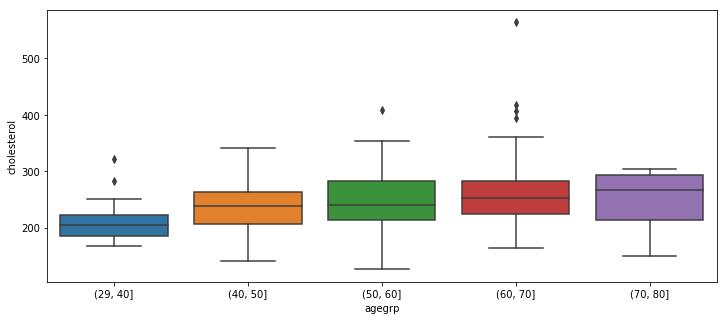

In [16]:


plt.figure(figsize=(12,5))
sns.boxplot(x = "agegrp", y = "cholesterol", data=df_train)

<b>Age group from 40-50, 50-60, 60-70 have almost same cholesterol levels</b>

<h3>Count for patients suffering from heart disease</h3>

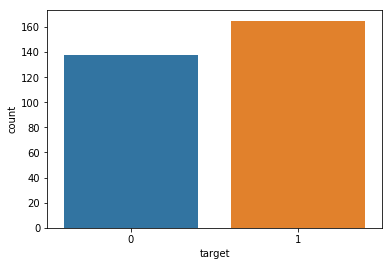

In [17]:
sns.countplot(x = 'target', data = df_train)

In [18]:
df_train['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [19]:
def percentage_cal(df):
    zeros = df[df['target'] == 0]['target'].count()
    ones = df[df['target'] == 1]['target'].count()
    total = zeros + ones
    # percentage calculation
    print("No Heart disease (0's): " + str(round((zeros/total) * 100, 2)) + " %\nDisease Possibility (1's): "
          + str(round((ones/total) * 100, 2)) + ' %')
percentage_cal(df_train)

No Heart disease (0's): 45.54 %
Disease Possibility (1's): 54.46 %


### It is a balanced dataset

## Treating categorical features
### One hot encoding

In [20]:
df_train = df_train.drop('agegrp', axis = 1)

In [21]:
df_train = pd.get_dummies(data = df_train, columns = ['sex', 'chest_pain_type', 'fasting_blood_pressure', 'rest_ecg', 
                                           'exercise_induced_angina', 'slope', 'num_major_vessels', 'thal'], dtype= 'int')

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 31 columns):
age                          303 non-null int64
resting_blood_pressure       303 non-null int64
cholesterol                  303 non-null int64
max_heart_rate_achieved      303 non-null int64
st_depression                303 non-null float64
target                       303 non-null int64
sex_0                        303 non-null int32
sex_1                        303 non-null int32
chest_pain_type_0            303 non-null int32
chest_pain_type_1            303 non-null int32
chest_pain_type_2            303 non-null int32
chest_pain_type_3            303 non-null int32
fasting_blood_pressure_0     303 non-null int32
fasting_blood_pressure_1     303 non-null int32
rest_ecg_0                   303 non-null int32
rest_ecg_1                   303 non-null int32
rest_ecg_2                   303 non-null int32
exercise_induced_angina_0    303 non-null int32
exercise_induced_angina_1    

<h3>Standard Scaler</h3>

In [23]:
# from sklearn.preprocessing import StandardScaler
# standardScaler = StandardScaler()
# scale_columns = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression']

# df_train[scale_columns] = standardScaler.fit_transform(df_train[scale_columns])

In [24]:
df_train.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,target,sex_0,sex_1,chest_pain_type_0,chest_pain_type_1,...,slope_2,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,num_major_vessels_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


# Model

In [25]:
# Training model
    
X = df_train.drop('target', axis = 1)
y = df_train['target']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

In [35]:
X_test.sample()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,sex_0,sex_1,chest_pain_type_0,chest_pain_type_1,chest_pain_type_2,...,slope_2,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,num_major_vessels_4,thal_0,thal_1,thal_2,thal_3
247,66,160,246,120,0.0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [36]:
X_test.loc[247]

age                           66.0
resting_blood_pressure       160.0
cholesterol                  246.0
max_heart_rate_achieved      120.0
st_depression                  0.0
sex_0                          0.0
sex_1                          1.0
chest_pain_type_0              0.0
chest_pain_type_1              1.0
chest_pain_type_2              0.0
chest_pain_type_3              0.0
fasting_blood_pressure_0       1.0
fasting_blood_pressure_1       0.0
rest_ecg_0                     0.0
rest_ecg_1                     1.0
rest_ecg_2                     0.0
exercise_induced_angina_0      0.0
exercise_induced_angina_1      1.0
slope_0                        0.0
slope_1                        1.0
slope_2                        0.0
num_major_vessels_0            0.0
num_major_vessels_1            0.0
num_major_vessels_2            0.0
num_major_vessels_3            1.0
num_major_vessels_4            0.0
thal_0                         0.0
thal_1                         1.0
thal_2              

In [37]:
y_test.loc[247]

0

In [30]:
#Linear Regression

linear = LinearRegression()
linear.fit(X_train, y_train)
pred_linear = linear.predict(X_test)
pred_linear = np.around(pred_linear).astype('int')


#**Logistic Regression**

logistic = LogisticRegression(max_iter=10000)
logistic.fit(X_train, y_train)
pred_logistic = logistic.predict(X_test)

#**SVM**

svc = SVC()
svc.fit(X_train, y_train)
pred_svm = svc.predict(X_test)


#**Decision Tree**

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred_dt_clf = dt_clf.predict(X_test)

#**Bagging**

b_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100, max_samples = 100, random_state = 0)
b_clf.fit(X_train, y_train)
pred_b_clf = b_clf.predict(X_test)

#**Random Forest**

rf_clf = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 100, n_jobs = 100, random_state = 0)
rf_clf.fit(X_train, y_train)
pred_rf_clf = rf_clf.predict(X_test)

# KNN
classifier= KNeighborsClassifier(n_neighbors=6)  
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)



# **Scores**
model_list = ['Linear Regression', 'Logistic Regression', 'SVM', 'Decision Tree', 'Bagging', 'Random Forest', 'KNN']
prediction_list = [pred_linear, pred_logistic, pred_svm, pred_dt_clf, pred_b_clf, pred_rf_clf, y_pred]

dc = dict()
for pred, model in zip(prediction_list, model_list):
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, pred, average='macro')
    dc[model] = {'Accuracy':np.around(accuracy_score(y_test, pred), decimals = 3), 
                   'Precision': np.around(precision, decimals = 3), 
                   'Recall': np.around(recall, decimals = 3), 
                   'F1- score': np.around(f1, decimals = 3), 
                   'ROC AUC Score': np.around(roc_auc_score(y_test, pred), decimals = 3),
                   'RMSE': np.around(np.sqrt(mean_squared_error(y_test, pred)), decimals = 3)
                   }

C:\Users\Wagle\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# With standard scalar
dc_scores = pd.DataFrame(dc)
dc_scores

,Linear Regression,Logistic Regression,SVM,Decision Tree,Bagging,Random Forest,KNN
Accuracy,0.923,0.934,0.659,0.824,0.912,0.527,0.725
F1- score,0.923,0.934,0.645,0.824,0.912,0.345,0.725
Precision,0.923,0.934,0.670,0.825,0.912,0.264,0.730
RMSE,0.277,0.257,0.584,0.419,0.296,0.687,0.524
ROC AUC Score,0.922,0.934,0.650,0.826,0.912,0.500,0.729
Recall,0.922,0.934,0.650,0.826,0.912,0.500,0.729


# Logistic Regression is the best performing model

In [26]:
import pickle
pickle.dump(logistic, open('Heart_Disease.sav', 'wb'))